# Mini-Project (Rotten Tomatoes Movie Reviews) - by Harish

### Sentiment Analysis

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
train_data=pd.read_csv('train.csv',delimiter='\t')
test_data=pd.read_csv('test.csv',delimiter='\t')

In [85]:
train_data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [86]:
test_data.head(10)

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
5,156066,8545,intermittently pleasing but
6,156067,8545,intermittently pleasing
7,156068,8545,intermittently
8,156069,8545,pleasing
9,156070,8545,but


In [87]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [88]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
PhraseId      66292 non-null int64
SentenceId    66292 non-null int64
Phrase        66292 non-null object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [89]:
train_data.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [90]:
test_data.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
dtype: int64

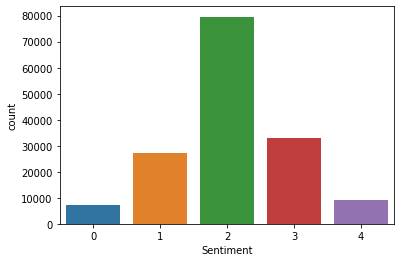

In [91]:
sns.countplot(x='Sentiment',data=train_data)

In [92]:
train_data.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [93]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [94]:
X = train_data['Phrase']
y = train_data['Sentiment']

In [95]:
from sklearn.model_selection import train_test_split
phrase_train,phrase_test,sentiment_train,sentiment_test = train_test_split(X,y,test_size = 0.4)

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [97]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('BOW',CountVectorizer()),('tfidf',TfidfTransformer()),('classifier',MultinomialNB())])

In [98]:
import nltk
nltk.download('wordnet')
pipeline.fit(phrase_train,sentiment_train)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harishprataprana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Pipeline(memory=None,
         steps=[('BOW',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [99]:
predictions = pipeline.predict(phrase_test)

In [100]:
test_predictions = pipeline.predict(test_data['Phrase'])

In [101]:
phrase_id = test_data['PhraseId'].values

In [102]:
test_predictions.shape

(66292,)

In [103]:
Submission_file = pd.DataFrame({'PhraseId':phrase_id,'Sentiment':test_predictions})

In [104]:
Submission_file.head(10)

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3
5,156066,3
6,156067,3
7,156068,3
8,156069,3
9,156070,2


In [105]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [106]:
print(classification_report(sentiment_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.02      0.05      2813
           1       0.51      0.23      0.32     10943
           2       0.60      0.90      0.72     31890
           3       0.53      0.37      0.43     13172
           4       0.59      0.04      0.07      3606

    accuracy                           0.58     62424
   macro avg       0.56      0.31      0.32     62424
weighted avg       0.57      0.58      0.52     62424



In [107]:
confusion_matrix(sentiment_test,predictions)

array([[   68,  1037,  1661,    47,     0],
       [   40,  2519,  8113,   269,     2],
       [   10,  1199, 28698,  1967,    16],
       [    2,   143,  8133,  4815,    79],
       [    0,    13,  1404,  2048,   141]])

In [108]:
accuracy_score(sentiment_test,predictions)

0.5805619633474305